In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Prepare dataframes for the training.
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes:
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 3000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016H[1])
dfdata = qr_data.getDF()

Load the data dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
number of events: 15355385
Count df
# lead eleMatch    =  13140104
# sublead eleMatch =  11557446
# lead trig   =  12641126
# sublead trg =  10075953
# lead trig and eleMatch    =  11975464
# sublead trig and eleMatch =  9328325
Data Sublead
Index([u'run', u'rho', u'nvtx', u'mass', u'weight', u'puweight', u'subleadPt',
       u'subleadScEta', u'subleadPhi', u'subleadScEnergy',
       u'subleadScPreshowerEnergy', u'subleadSigmaRR', u'subleadPhoIso03',
       u'subleadChIso03', u'subleadChIso03worst', u'subLeadPhoIDMVA',
       u'subleadR9', u'subleadS4', u'subleadEtaWidth', u'subleadPhiWidth',
       u'subleadSigmaIeIe', u'subleadCovarianceIetaIphi',
       u'subleadCovarianceIphiIphi'],
      dtype='objec

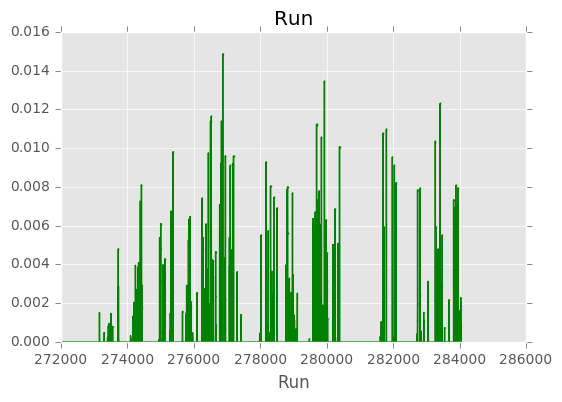

In [5]:
rv=np.arange(272006,284045,1)
#rv=np.arange(0,6,1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Run")
#plot histogram
plot.plotHistErr(dfdata.loc[:,"run"], rv,Color="g")
ax.set_title("Run")

In [6]:
#insert run period into dataframe
#create vector of run periods with the ends of each one.:
runPeriod=[272006,276811,277420,278808,280385,284045]
dfdata['runperiod'] = np.digitize(dfdata['run'],runPeriod)

In [7]:
#divide data frames to apply weights.
dfdata1   = dfdata  .query('runperiod==1').reset_index()  
dfdata2   = dfdata  .query('runperiod==2').reset_index()  
dfdata3   = dfdata  .query('runperiod==3').reset_index()  
dfdata4   = dfdata  .query('runperiod==4').reset_index()  
dfdata5   = dfdata  .query('runperiod==5').reset_index()  

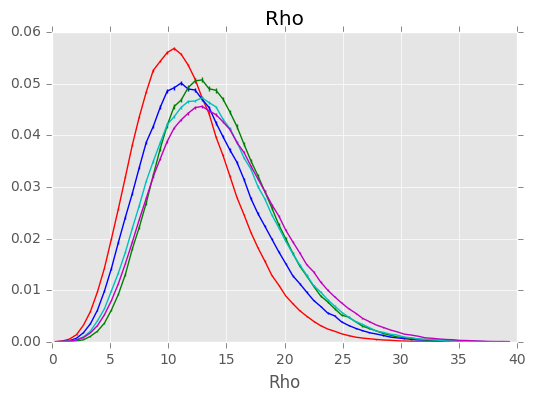

In [20]:
#check pileup
rv=np.arange(0,40,0.6)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
#plot histograms
plot.plotHistErr(dfdata1.loc[:,"rho"], rv,Color="r")
plot.plotHistErr(dfdata2.loc[:,"rho"], rv,Color="b")
plot.plotHistErr(dfdata3.loc[:,"rho"], rv,Color="g")
plot.plotHistErr(dfdata4.loc[:,"rho"], rv,Color="c")
plot.plotHistErr(dfdata5.loc[:,"rho"], rv,Color="m")
ax.set_title("Rho")

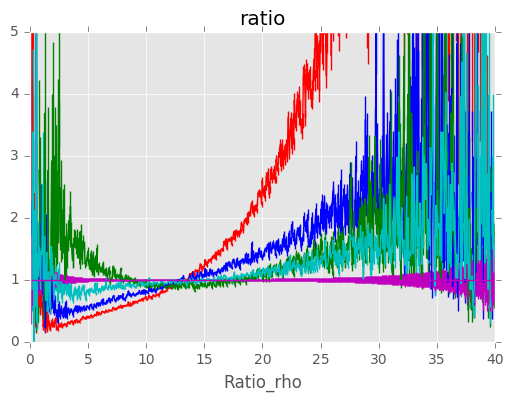

In [15]:
#so the pileup is different for every run, let's do the ratio first:
rv=np.arange(0,40,0.06)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata1.loc[:,"rho"],rv, Color="r")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata2.loc[:,"rho"],rv, Color="b")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata3.loc[:,"rho"],rv, Color="g")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata4.loc[:,"rho"],rv, Color="c")
plot.plotHistRatio(dfdata5.loc[:,"rho"],dfdata5.loc[:,"rho"],rv, Color="m")

ratiodata1,edge,ratiodataErr= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata1.loc[:,"rho"],rv)
ratiodata2,edge,ratiodataErrE= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata2.loc[:,"rho"],rv)
ratiodata3,edge,ratiodataErrF= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata3.loc[:,"rho"],rv)
ratiodata4,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata4.loc[:,"rho"],rv)

ax.set_ylim([0,5])

ax.set_title('ratio')

In [16]:
import pandas as pd
#find correction and create weight vector.
dfdata1['bin'] = np.digitize(dfdata1['rho'],edge)
dfdata1["weight"]= ratiodata1[dfdata1['bin'].values-1]

dfdata2['bin'] = np.digitize(dfdata2['rho'],edge)
dfdata2["weight"]= ratiodata2[dfdata2['bin'].values-1]

dfdata3['bin'] = np.digitize(dfdata3['rho'],edge)
dfdata3["weight"]= ratiodata3[dfdata3['bin'].values-1]

dfdata4['bin'] = np.digitize(dfdata4['rho'],edge)
dfdata4["weight"]= ratiodata4[dfdata4['bin'].values-1]
dfdata5["weight"]= len(dfdata4['bin'].values-1)

#cut some infinities:
dfdata1= dfdata1.query("weight<1000")
dfdata2= dfdata2.query("weight<1000")
dfdata3= dfdata3.query("weight<1000")
dfdata4= dfdata4.query("weight<1000")

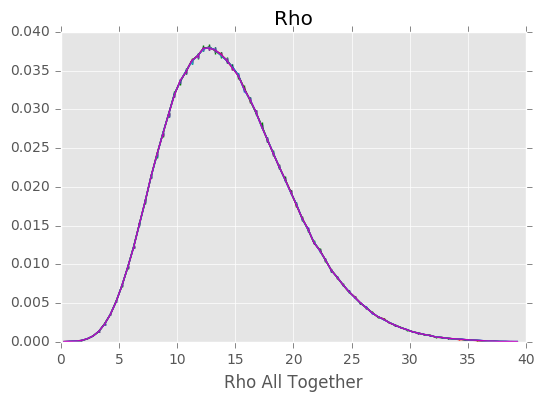

In [17]:
#Check if now Rho Match
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho All Together")
#plot histograms
plot.plotHistErr(dfdata1.loc[:,"rho"], rv,Color="r", Weight=dfdata1["weight"])
plot.plotHistErr(dfdata2.loc[:,"rho"], rv,Color="b", Weight=dfdata2["weight"])
plot.plotHistErr(dfdata3.loc[:,"rho"], rv,Color="g", Weight=dfdata3["weight"])
plot.plotHistErr(dfdata4.loc[:,"rho"], rv,Color="c", Weight=dfdata4["weight"])
plot.plotHistErr(dfdata5.loc[:,"rho"], rv,Color="m")
ax.set_title("Rho")

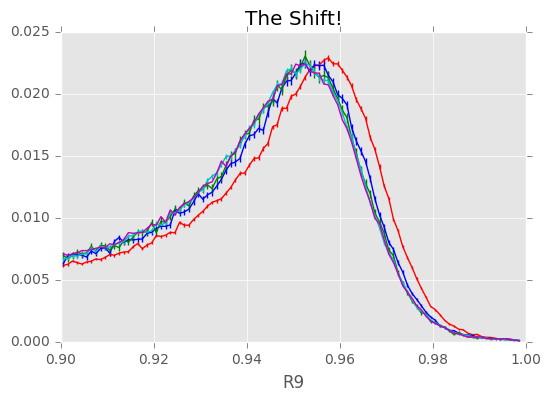

In [18]:
rv2 = np.arange(0.9,1.0,0.001)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
plot.plotHistErr(dfdata1.loc[:,"R9"], rv2,Color="r", Weight=dfdata1["weight"])
plot.plotHistErr(dfdata2.loc[:,"R9"], rv2,Color="b", Weight=dfdata2["weight"])
plot.plotHistErr(dfdata3.loc[:,"R9"], rv2,Color="g", Weight=dfdata3["weight"])
plot.plotHistErr(dfdata4.loc[:,"R9"], rv2,Color="c", Weight=dfdata4["weight"])
plot.plotHistErr(dfdata5.loc[:,"R9"], rv2,Color="m", Weight=dfdata5["weight"])   
ax.set_title('The Shift!')

In [13]:
#concatenate data frames into one
frame = [dfdata1, dfdata2, dfdata3, dfdata4,dfdata5]
dfdataFinal = pd.concat(frame).reset_index(drop=True)   
len(dfdataFinal.index)

2999893

In [14]:
#store dataframe to file for training:
dfname =  'df_data_Tot.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfdataFinal)
hdf.close()